In [1]:
# All Deep Learning Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
#warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from warnings import catch_warnings
from warnings import filterwarnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5
Date,
2021-01-01,228.53
2021-02-01,222.37
2021-03-01,128.14
2021-04-01,68.44
2021-05-01,62.51


In [3]:
# Split train data and test data
#train_size = int(len(df)*0.8)
train_size = 300
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 30
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (270, 30, 1)
y_train.shape:  (270, 1)
X_test.shape:  (35, 30, 1)
y_test.shape:  (35, 1)


In [4]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))# Dense =4 means four prediction layers 
    #Compile model
    model.compile(optimizer='Nadam',loss='mse')  #adam
    return model
model_bilstm = create_bilstm(64)   #64
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.5)) #Dropout=0.2
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.5))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='Nadam',loss='mse')
    return model
model_gru = create_gru(64)
# Create LSTM model
def create_lstm(units):
    model = Sequential()
    # Input layer
    model.add(LSTM(units = units, return_sequences=True, input_shape=[X_train.shape[1], X_train.shape[2]]))
    # Hidden layer
    model.add(LSTM(units = units))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='Nadam',loss='mse')
    return model
model_lstm = create_lstm(64)

# Create bidirectional GRU model
def create_bigru(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]])))
    model.add(Dropout(0.5)) 
    # Hidden layer
    model.add(Bidirectional(GRU(units = units))) 
    model.add(Dropout(0.5))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='Nadam',loss='mse')
    return model
model_bigru = create_bigru(64)


 

In [5]:
# Create stacked lstm model
def create_stlstm(units):
    model = Sequential()
    # Input layer
    model.add(
              LSTM(units = units, return_sequences=True, 
              input_shape=[X_train.shape[1], X_train.shape[2]]))
    # Hidden layer
    model.add(LSTM(units = units,return_sequences=True))
    model.add(LSTM(units = units,return_sequences=True))
    model.add(LSTM(units = units))
    model.add(Dense(1))
    
 
    #Compile model
    model.compile(optimizer='Nadam',loss='mse')
    return model
model_stlstm = create_stlstm(64)


In [6]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 50,  
                        validation_split = 0.2,  # vs=0.2
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_bigru = fit_model(model_bigru)
history_stlstm = fit_model(model_stlstm)

Epoch 1/50
14/14 [==============================] - 5s 74ms/step - loss: 0.0474 - val_loss: 0.0168
Epoch 2/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0283 - val_loss: 0.0180
Epoch 3/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0262 - val_loss: 0.0177
Epoch 4/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0235 - val_loss: 0.0183
Epoch 5/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0238 - val_loss: 0.0172
Epoch 6/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0250 - val_loss: 0.0169
Epoch 7/50
14/14 [==============================] - 0s 22ms/step - loss: 0.0254 - val_loss: 0.0170
Epoch 8/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0245 - val_loss: 0.0164
Epoch 9/50
14/14 [==============================] - 0s 19ms/step - loss: 0.0254 - val_loss: 0.0177
Epoch 10/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0248 - val_loss: 0.0168
Epoch 11/

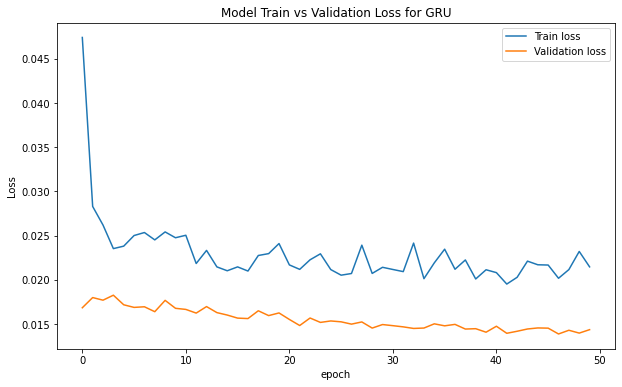

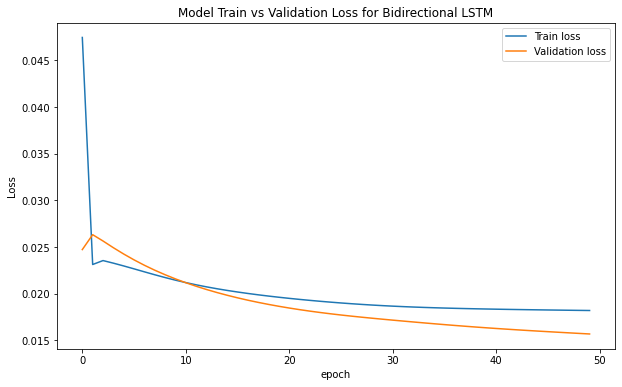

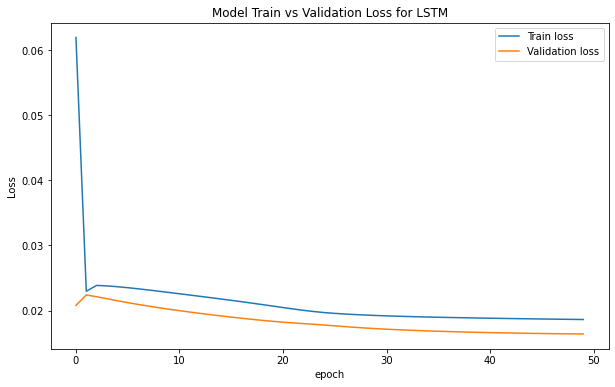

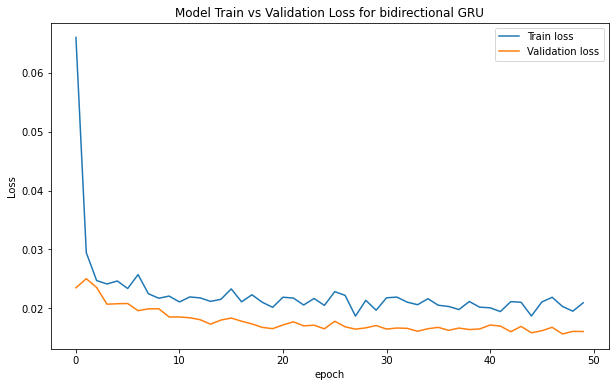

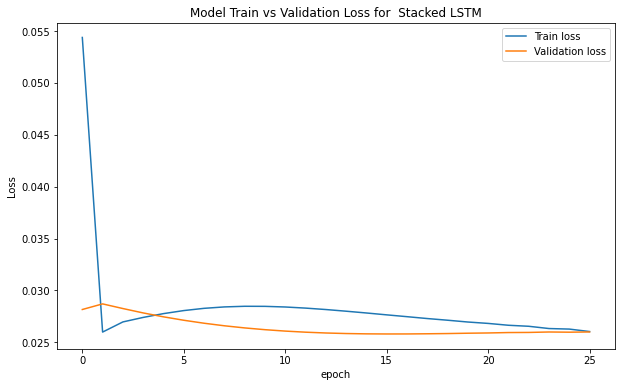

In [7]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss(history_gru, 'GRU')
plot_loss(history_bilstm, 'Bidirectional LSTM')
plot_loss(history_lstm, 'LSTM')
plot_loss(history_bigru, 'bidirectional GRU')
plot_loss(history_stlstm, ' Stacked LSTM')

2/2 [==============================] - 1s 0s/step


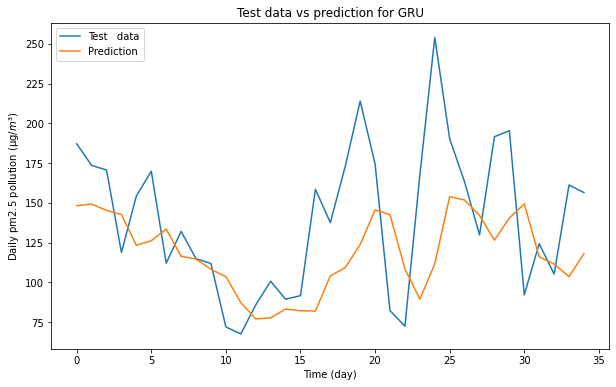

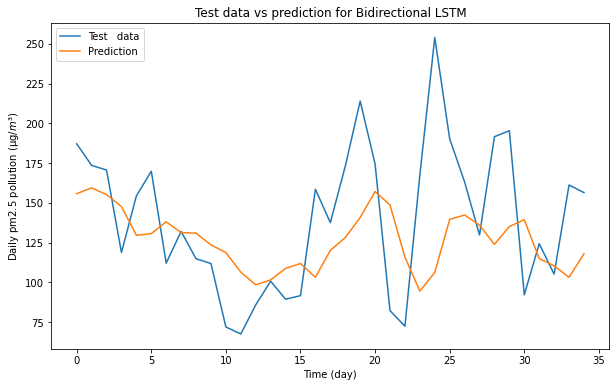

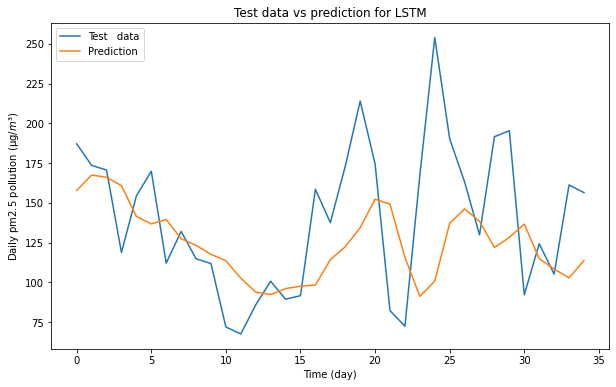

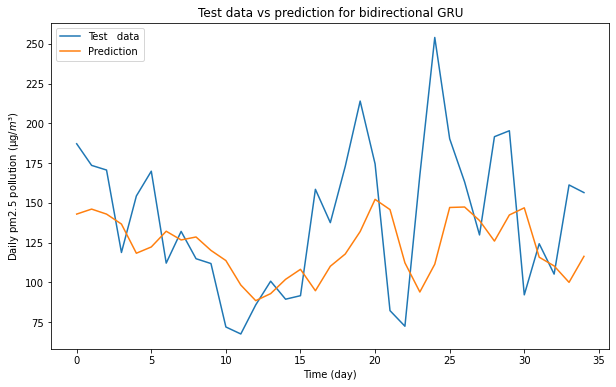

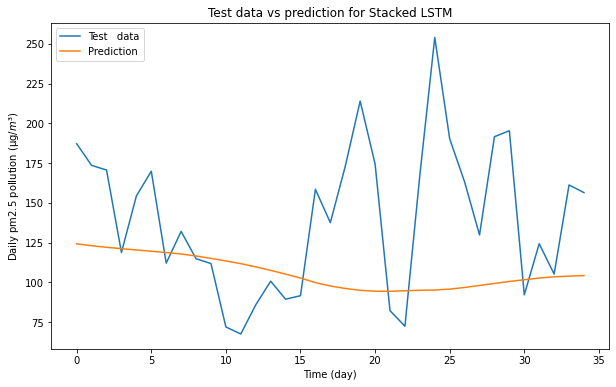

In [8]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_bigru = prediction(model_bigru)
prediction_stlstm = prediction(model_stlstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily pm2.5 pollution (µg/$m³$)')
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_bigru, 'bidirectional GRU', y_test)
plot_future(prediction_stlstm, 'Stacked LSTM', y_test)

In [9]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_bigru, y_test, 'Bidirectional GRU')
evaluate_prediction(prediction_stlstm, y_test, 'Stacked LSTM')

GRU:
Mean Absolute Error: 36.7024
Root Mean Square Error: 47.0194

Bidirectional LSTM:
Mean Absolute Error: 35.7050
Root Mean Square Error: 45.6907

LSTM:
Mean Absolute Error: 35.1170
Root Mean Square Error: 46.9237

Bidirectional GRU:
Mean Absolute Error: 36.7667
Root Mean Square Error: 46.4284

Stacked LSTM:
Mean Absolute Error: 45.1433
Root Mean Square Error: 58.1946



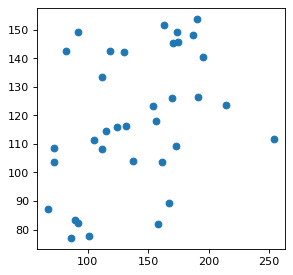

<AxesSubplot:>

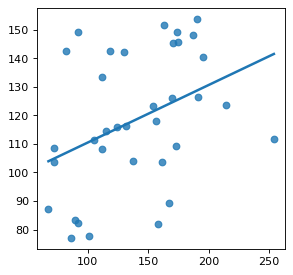

In [10]:
#for GRU
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_test,prediction_gru)
plt.show()

import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_test,prediction_gru,ci=None)

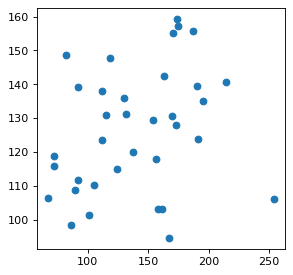

<AxesSubplot:>

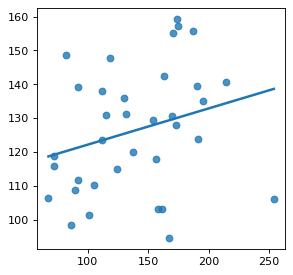

In [11]:
#for BIDIRECTIONAL LSTM
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_test,prediction_bilstm)
plt.show()

import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_test,prediction_bilstm,ci=None)

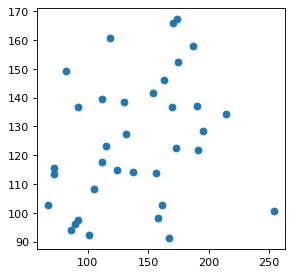

<AxesSubplot:>

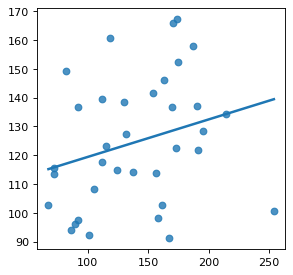

In [12]:
#for  LSTM
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_test,prediction_lstm)
plt.show()

import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_test,prediction_lstm,ci=None)

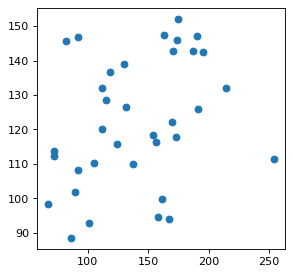

<AxesSubplot:>

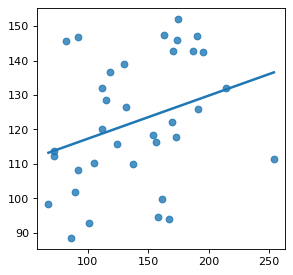

In [13]:
#for bidirectional GRU
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_test,prediction_bigru)
plt.show()

import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_test,prediction_bigru,ci=None)

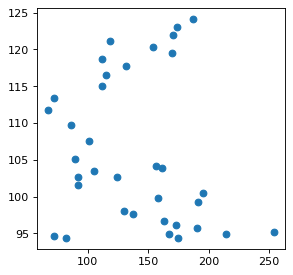

<AxesSubplot:>

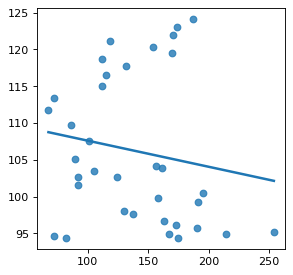

In [14]:
#for  Stacked LSTM
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_test,prediction_stlstm)
plt.show()

import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_test,prediction_stlstm,ci=None)